In [ ]:
# Some mathematical operations on image

[[132 134 175]
 [133 135 175]
 [134 136 176]
 ...
 [131 144 189]
 [131 144 189]
 [131 144 189]]


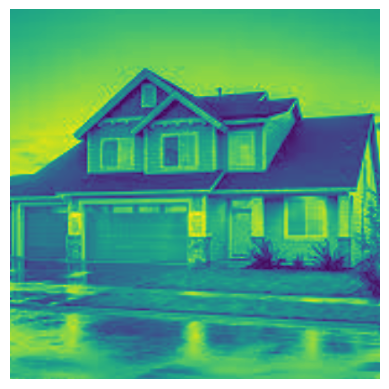

In [3]:
# Revision
import cv2
import matplotlib.pyplot as plt

im_path = 'pic1.png'
im = cv2.imread(im_path)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_rgb)
plt.imshow(im_gray)
plt.axis('off')

print(im_rgb[0])


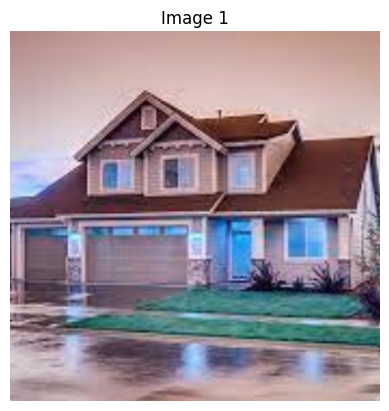

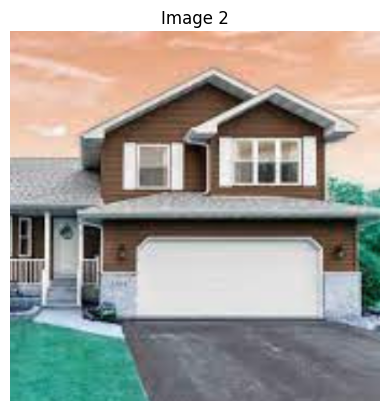

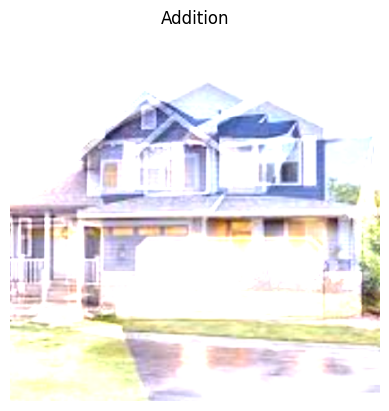

[175 134 132]
[226 164 136]
[255 255 255]


In [5]:
# Image addition
im1 = cv2.imread('pic1.png')
im2 = cv2.imread('pic2.png')

im_bgr = cv2.add(im1,im2)
im_add = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(im1)
plt.title('Image 1')
plt.axis('off')
plt.show()

plt.imshow(im2)
plt.title('Image 2')
plt.axis('off')
plt.show()

plt.imshow(im_add)
plt.title('Addition')
plt.axis('off')
plt.show()

print(im1[0][0])

print(im2[0][0])

print(im_add[0][0])

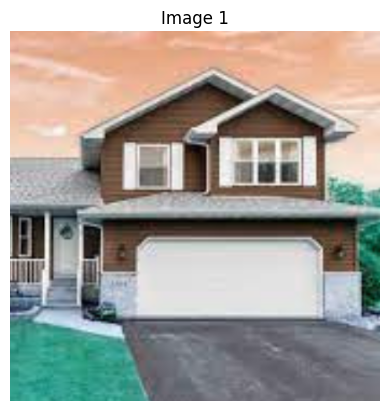

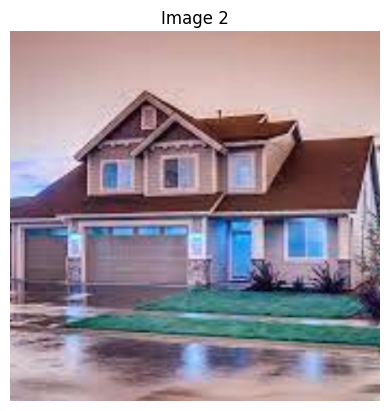

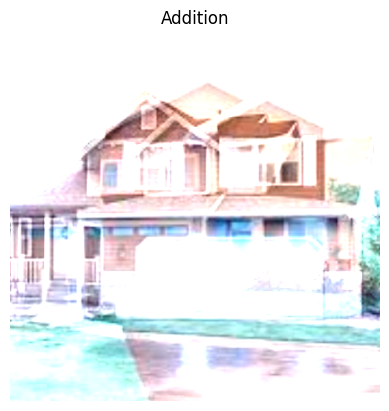

In [ ]:
# Image addition bgr
im1 = cv2.imread('/content/1.png')
im2 = cv2.imread('/content/2.png')

im_add = cv2.add(im1,im2)

plt.imshow(im1)
plt.title('Image 1')
plt.axis('off')
plt.show()

plt.imshow(im2)
plt.title('Image 2')
plt.axis('off')
plt.show()

plt.imshow(im_add)
plt.title('Addition')
plt.axis('off')
plt.show()

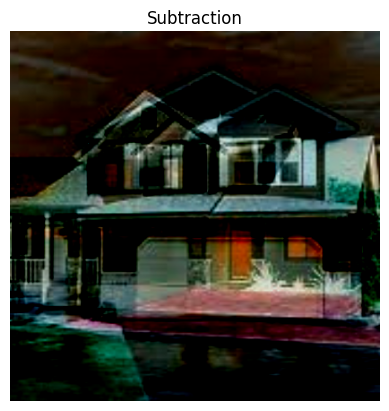

In [ ]:
# image subtraction
im_sub = cv2.subtract(im1,im2)

plt.imshow(im_sub)
plt.title('Subtraction')
plt.axis('off')
plt.show()

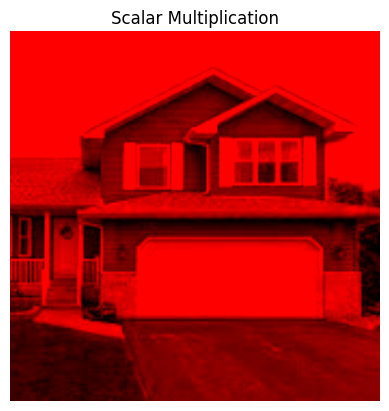

[226 164 136]
[255   0   0]


In [ ]:
# Scalar multiplication
a = 1.2
im_scm = cv2.multiply(im1,a)

plt.imshow(im_scm)
plt.title('Scalar Multiplication')
plt.axis('off')
plt.show()


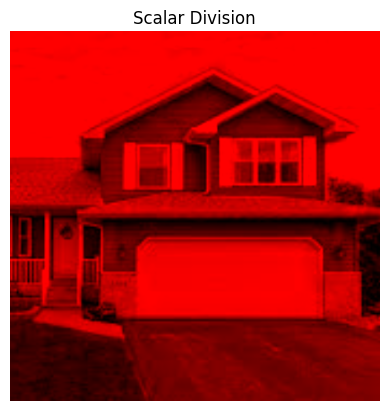

[226 164 136]
413
413
[251   0   0]


In [ ]:
# Scalar division
b = 0.9
im_scd = cv2.divide(im1, b)

plt.imshow(im_scd)
plt.title('Scalar Division')
plt.axis('off')
plt.show()

print(im1[0][0])

print(im_scd[0][0])

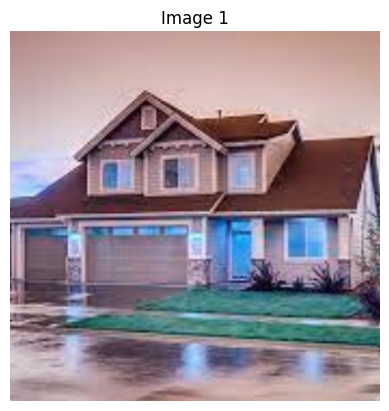

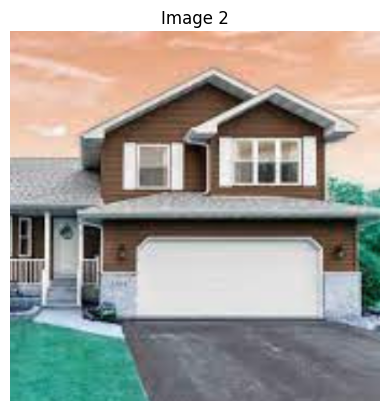

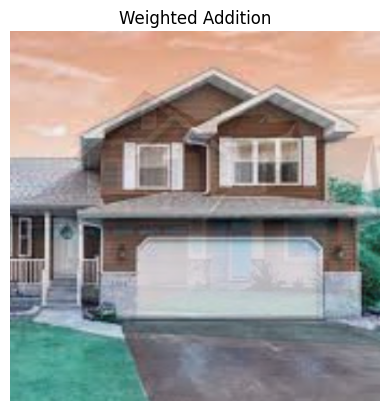

[175 134 132]
[226 164 136]
[216 158 135]


In [6]:
# Weighted addition af + gy, a + b = 1
a = 0.2
b = 1 - a

im_addWeighted = cv2.addWeighted(im1, a, im2, b, 0) # last parameter 0 is optional

plt.imshow(im1)
plt.title('Image 1')
plt.axis('off')
plt.show()

plt.imshow(im2)
plt.title('Image 2')
plt.axis('off')
plt.show()

plt.imshow(im_addWeighted)
plt.title('Weighted Addition')
plt.axis('off')
plt.show()

print(im1[0][0])

print(im2[0][0])

print(im_addWeighted[0][0])

[175 134 132]
[226 164 136]
[216 158 135]
[216   0   0]


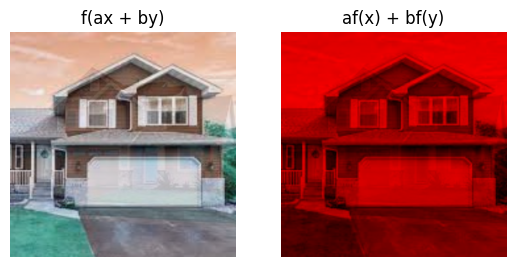

In [7]:
# Linearity and nonlinearity

# Linearity
im_addWeighted2 = cv2.add(cv2.multiply(im1,a), cv2.multiply(im2,b))

plt.subplot(121)
plt.imshow(im_addWeighted)
plt.title('f(ax + by)')
plt.axis('off')

plt.subplot(122)
plt.imshow(im_addWeighted2)
plt.title('af(x) + bf(y)')
plt.axis('off')

print(im1[0][0])

print(im2[0][0])

print(im_addWeighted[0][0])

print(im_addWeighted2[0][0])

(-0.5, 412.5, 412.5, -0.5)

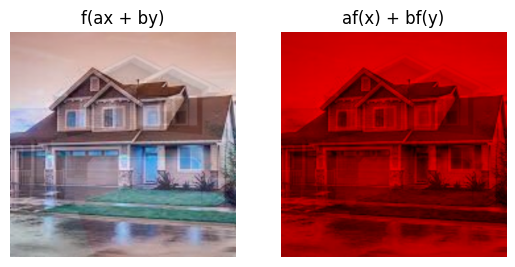

In [ ]:
import numpy as np

# Linearity
a = 0.2
b = 1 - a

im_addWeighted = cv2.addWeighted(im1, a, im2, b, 0) # last parameter 0 is optional
im_addWeighted2 = cv2.add(cv2.multiply(im1,a), cv2.multiply(im2,b))

#im_addWeighted2 = cv2.cvtColor(im_addWeighted2, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(im_addWeighted)
plt.title('f(ax + by)')
plt.axis('off')

plt.subplot(122)
plt.imshow(im_addWeighted2)
plt.title('af(x) + bf(y)')
plt.axis('off')

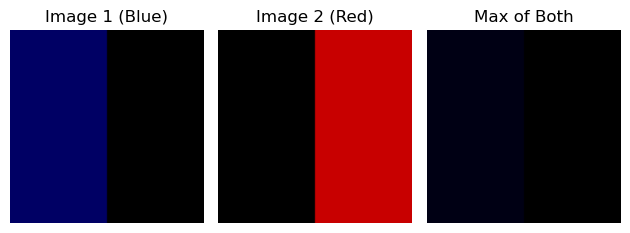

Maximum pixel value in Image 1: 11.0
Maximum pixel value in Image 2: 60.0
Maximum pixel value in Max Operator result: 2.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic images (100x100 pixels)
im1 = np.zeros((100, 100, 3), dtype = np.uint8)
#which means each element can hold unsigned 8-bit integers (ranging from 0 to 255)
im1[:, :50] = [100, 0, 0]  # Left half is blue (pixel intensity 100)
#This selects all rows (:) and the first 50 columns (:50)
#and sets the selected region to the color [100, 0, 0], which is a dark red

im2 = np.zeros((100, 100, 3), dtype=np.uint8)
im2[:, 50:] = [0, 0, 200]  # Right half is red (pixel intensity 200)

# Define the weights for non-linear combination
a = 0.2
b = 1 - a

# Perform non-linear combination using the max operator
im_max = np.maximum(cv2.multiply(im1, a), cv2.multiply(im2, b))

# Find the maximum pixel values and their locations
_, max_val1, _, max_loc1 = cv2.minMaxLoc(cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY))
_, max_val2, _, max_loc2 = cv2.minMaxLoc(cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY))
_, max_val_max, _, max_loc_max = cv2.minMaxLoc(cv2.cvtColor(im_max, cv2.COLOR_BGR2GRAY))

# Display the images
plt.subplot(131) #
plt.imshow(im1[:, :, ::-1])
plt.title('Image 1 (Blue)')
plt.axis('off')

plt.subplot(132)
plt.imshow(im2[:, :, ::-1])
plt.title('Image 2 (Red)')
plt.axis('off')

plt.subplot(133)
plt.imshow(im_max[:, :, ::-1])
plt.title('Max of Both')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Maximum pixel value in Image 1:", max_val1)
print("Maximum pixel value in Image 2:", max_val2)
print("Maximum pixel value in Max Operator result:", max_val_max)


(-0.5, 412.5, 412.5, -0.5)

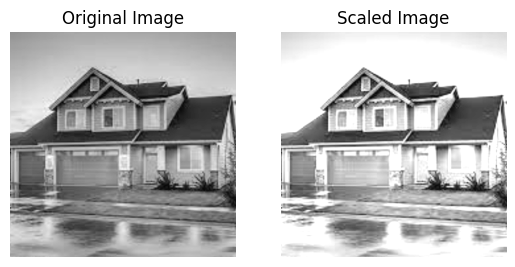

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read a grayscale image
image = cv2.imread('pic1.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to float32 data type for accurate calculations
image = image.astype(np.float32)

# Define the scalar value (e.g., brighten the image by a factor of 1.5)
scalar_value = 1.5

# Perform scalar multiplication using direct NumPy array operations
scaled_image = image * scalar_value

# Clip the resulting values to the valid pixel value range [0, 255]
scaled_image = np.clip(scaled_image, 0, 255)

# Convert the result back to uint8 data type for visualization
scaled_image = scaled_image.astype(np.uint8)

# Display the original and scaled images
plt.subplot(121)
plt.imshow(image.astype(np.uint8), cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(scaled_image, cmap = 'gray')
plt.title('Scaled Image')
plt.axis('off')


(-0.5, 412.5, 412.5, -0.5)

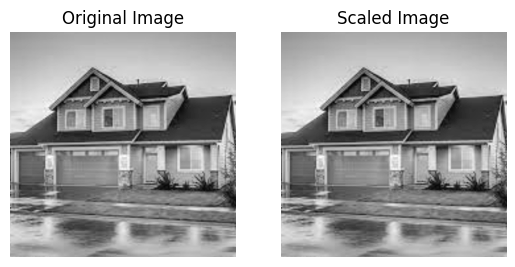

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read a grayscale image
image = cv2.imread('pic1.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to float32 data type for accurate calculations
image1 = image.astype(np.float32)

# Define the scalar value (e.g., brighten the image by a factor of 1.5)
scalar_value = 1.5

# Create a 3-channel image where each channel has the same value as the grayscale image
bgr_image = cv2.merge([image1, image1, image1])

# Perform scalar multiplication using cv2.multiply()
scaled_bgr_image = cv2.multiply(bgr_image, scalar_value)

# Convert the scaled 3-channel image back to grayscale by taking the mean of the three channels
scaled_image = np.mean(scaled_bgr_image, axis = 2)

# Clip the resulting values to the valid pixel value range [0, 255]
scaled_image = np.clip(scaled_image, 0, 255)

# Convert the result back to uint8 data type for visualization
#scaled_image = scaled_image.astype(np.uint8)

# Display the original and scaled images
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(scaled_image, cmap = 'gray')
plt.title('Scaled Image')
plt.axis('off')


(-0.5, 412.5, 412.5, -0.5)

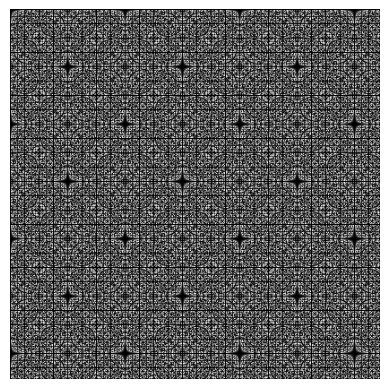

In [ ]:
for i in range(413):
  for j in range(413):
    im[i][j]=i*i*j*j

plt.imshow(im)
plt.axis('off')